<a href="https://colab.research.google.com/github/whyrzky/DS-Portfolio-Projects/blob/main/Crisis%20Prediction%20with%20Machine%20Learning%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path ="/content/gdrive/MyDrive/Belajar Python/Final Project/" 

df = pd.read_csv(path+'data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.head(5)

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
0,0,1845.2,6068.2,504.27,1.24,15.56,4.36,14.567329,376.63,1.2366,10.66,0.0055,6.46,1
1,1,2055.0,6259.1,612.20,1.24,16.63,5.83,16.707625,375.39,1.2129,12.15,0.0056,6.16,1
2,4,1750.0,5767.5,624.33,1.22,14.77,7.92,16.067787,388.69,1.0374,12.58,0.0066,6.77,0
3,5,1812.0,6392.7,614.41,1.19,14.29,7.91,16.274743,396.82,1.0315,12.23,0.0060,7.04,0
4,6,2124.0,6615.6,556.34,1.18,16.66,9.74,16.913348,397.52,1.0400,12.08,0.0060,6.76,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Id                                      270 non-null    int64  
 1   Ekspor                                  270 non-null    float64
 2   Cadangan Devisa                         270 non-null    float64
 3   IHSG                                    270 non-null    float64
 4   Selisih Pinjaman dan Simpanan           270 non-null    float64
 5   Suku Bunga Simpanan Riil                270 non-null    float64
 6   Selisih BI Rate Riil dan FED Rate Riil  270 non-null    float64
 7   Simpanan bank                           270 non-null    float64
 8   Nilai Tukar Riil                        270 non-null    float64
 9   Nilai Tukar Perdagangan                 270 non-null    float64
 10  M1                                      270 non-null    float6

In [ ]:
df.describe()

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,174.429630,8247.868963,53516.383556,2071.609444,1.500222,12.016000,8.328000,134.058398,7232.566259,1.225759,41.406296,0.003716,6.763333,0.111111
std,101.887141,4853.028611,41132.468503,2014.293535,0.333443,7.509484,7.233576,100.175825,5550.579030,0.214566,29.628941,0.001151,5.115211,0.314853
min,0.000000,1750.000000,5767.500000,226.680000,0.660000,0.680000,1.250000,14.567329,375.390000,0.851500,7.350000,0.002000,4.190000,0.000000
25%,88.250000,4082.750000,19042.000000,462.717500,1.220000,6.622500,5.107500,58.468779,742.267500,1.063950,16.475000,0.003000,5.020000,0.000000
50%,172.500000,6261.415000,34816.185000,759.030000,1.505000,10.395000,6.515000,83.851499,6753.570000,1.166350,26.455000,0.003200,6.180000,0.000000
75%,262.750000,12936.765000,102477.375000,3916.700000,1.760000,15.330000,8.822500,245.694303,10000.275000,1.373825,73.185000,0.004600,7.900000,0.000000
max,351.000000,18530.800000,130196.380000,6597.220000,2.410000,52.980000,59.880000,330.612337,19358.390000,1.857700,104.840000,0.006600,86.970000,1.000000


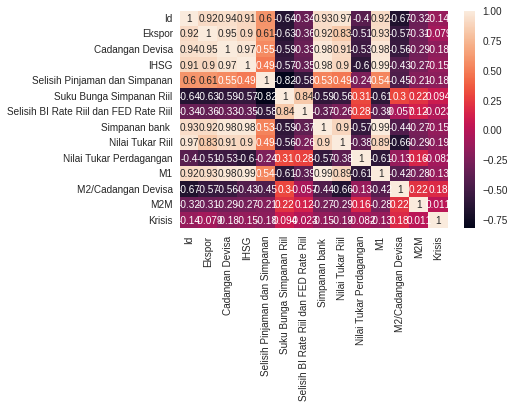

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df = df.drop('Id', axis=1)
df = df.drop('M2/Cadangan Devisa', axis=1)
df = df.drop('Nilai Tukar Perdagangan', axis=1)
df = df.drop('Selisih BI Rate Riil dan FED Rate Riil', axis=1)
df = df.drop('M2M', axis=1)

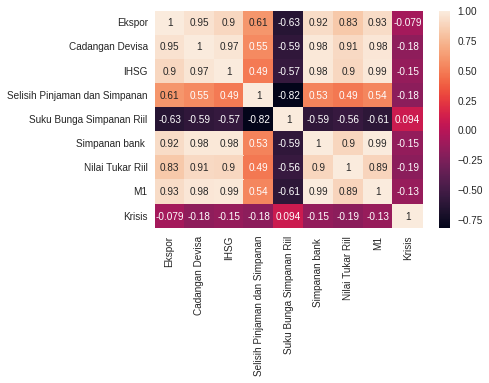

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import train_test_split 

In [ ]:
col = ['Ekspor','Cadangan Devisa','IHSG','Selisih Pinjaman dan Simpanan','Suku Bunga Simpanan Riil','Simpanan bank ','Nilai Tukar Riil','M1']
X = df[col]
y = df['Krisis']

model = LinearDiscriminantAnalysis()
model.fit(X,y)

LinearDiscriminantAnalysis()

### Testing

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X,y, scoring='accuracy',cv=cv,n_jobs=-1)
print(np.mean(scores))


0.8839506172839505


In [ ]:
p = df[['Ekspor','Cadangan Devisa','IHSG','Selisih Pinjaman dan Simpanan','Suku Bunga Simpanan Riil','Simpanan bank ','Nilai Tukar Riil','M1']]
q = df['Krisis']

p_train,p_test,q_train,q_test = train_test_split(p,q,test_size=0.2,random_state=4)

print(p_train.shape)
print(p_test.shape)

(216, 8)
(54, 8)


In [ ]:
k_range = range(1,26)
Scores = {}
Scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(p_train,q_train)
    q_pred = knn.predict(p_test)
    Scores[k] = metrics.accuracy_score(q_test,q_pred)
    Scores_list.append(metrics.accuracy_score(q_test,q_pred))

In [ ]:
Scores

{1: 0.9814814814814815,
 2: 0.9814814814814815,
 3: 0.9814814814814815,
 4: 0.9814814814814815,
 5: 0.9444444444444444,
 6: 0.9814814814814815,
 7: 0.9629629629629629,
 8: 0.9629629629629629,
 9: 0.9629629629629629,
 10: 0.9629629629629629,
 11: 0.9259259259259259,
 12: 0.9444444444444444,
 13: 0.9259259259259259,
 14: 0.9444444444444444,
 15: 0.9074074074074074,
 16: 0.9629629629629629,
 17: 0.9444444444444444,
 18: 0.9629629629629629,
 19: 0.9444444444444444,
 20: 0.9444444444444444,
 21: 0.9444444444444444,
 22: 0.9629629629629629,
 23: 0.9629629629629629,
 24: 0.9629629629629629,
 25: 0.9629629629629629}

0.8839506172839505


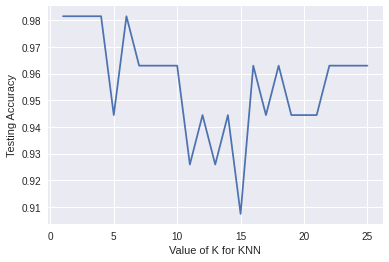

In [ ]:
plt.plot(k_range,Scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Scores = cross_val_score(model, X,y, scoring='accuracy',cv=cv,n_jobs=-1)
print(np.mean(Scores))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(p,q)

KNeighborsClassifier()

In [ ]:
classes = {0:'TIDAK KRISIS',1:'KRISIS'}

In [ ]:
x_new = [[np.random.randint(6600,6800),np.random.randint(6600,6800),np.random.randint(86,89),np.random.randint(86,89),15,12,np.random.randint(2600,2800),np.random.randint(2600,2800)]] #,[18,16,]
x_new
y_predict = knn.predict(x_new)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path ="/content/gdrive/MyDrive/Belajar Python/Final Project/" 

df_predict = pd.read_csv(path+'predict.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
X_prediksi = df

In [ ]:
x_predict.drop('Krisis')

,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Simpanan bank,Nilai Tukar Riil,M1,Krisis
0,1845.2,6068.20,504.27,1.24,15.56,14.567329,376.63,10.66,1
1,2055.0,6259.10,612.20,1.24,16.63,16.707625,375.39,12.15,1
2,1750.0,5767.50,624.33,1.22,14.77,16.067787,388.69,12.58,0
3,1812.0,6392.70,614.41,1.19,14.29,16.274743,396.82,12.23,0
4,2124.0,6615.60,556.34,1.18,16.66,16.913348,397.52,12.08,0
...,...,...,...,...,...,...,...,...,...
265,13927.9,120075.16,6532.97,1.52,6.58,328.414357,18191.69,97.89,0
266,12555.9,123273.87,6443.35,1.53,6.99,330.319123,18087.59,98.64,0
267,14121.9,124539.31,6468.76,1.53,6.74,328.479665,18239.04,100.14,0
268,13112.7,124293.82,6455.35,1.54,6.39,330.069829,18186.00,102.12,0


In [ ]:
print(classes[y_predict[0]])

TIDAK KRISIS
